In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy import stats as st
import time            # Imports system time module to time your script

plt.close('all')  # close all open figures

In [2]:
# -----------------------------------------------
# Root finding
# -----------------------------------------------

# Set parameter values
N_y     = 1.0
N_o     = 1.0
alpha   = 0.3
A       = 1
beta    = 0.9
delta   = 0.0
tau_L   = 0.2
tau_K   = 0.15
t_y     = 0.0
t_o     = 0.0
#
L       = 1

# -------------------------------------------------------------
# Method 1: Root finding
# -------------------------------------------------------------
# Find x so that f(x) = 0

# Define function of capital K so that func(K) = 0

def func(K):
    s = - K + N_y\
    *((beta*(1+(1-tau_K)*(alpha*A*K**(alpha-1) - delta))* \
    ((1-tau_L)*((1-alpha)*A*K**alpha) + t_y) - t_o) \
    /((1+beta)*(1. + (1-tau_K)*(alpha*A*K**(alpha-1) - delta))))

    return s

# Plot the function to see whether it has a root-point
Kmin = 0.0001
Kmax = 0.3

# Span grid with gridpoints between Kmin and Kmax
Kv = np.linspace(Kmin, Kmax, 200)

# Output vector prefilled with zeros
fKv = np.zeros(len(Kv),float) # define column vector

for i,K in enumerate(Kv):
    fKv[i] = func(K)

#print("fK=", fK)

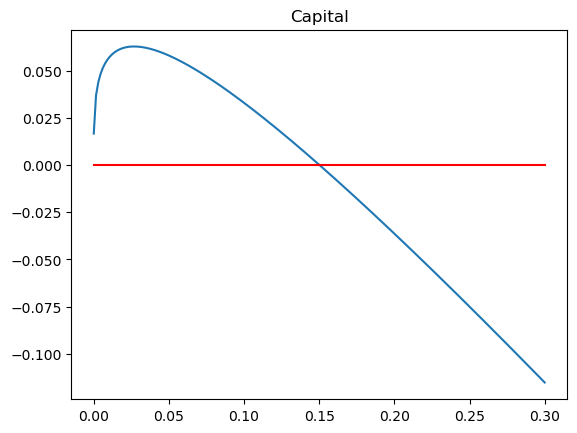

In [3]:
# Let us plot this function now for different values of capital K to see where the root of this function is:

fig, ax = plt.subplots()
ax.plot(Kv, fKv)
# Plot horizontal line at zero in red
ax.plot(Kv, np.zeros(len(Kv)), 'r')
ax.set_title('Capital')
plt.show()

In [4]:
from scipy.optimize import fsolve

# Use built in 'fsolve'
print(" ")
print(" -------------- Fsolve ------------")

k_guess = 2  # our starting guess
solutionK = fsolve(func, k_guess) # starting from K = 2

# Kstar is a numpy array which does not print well
# We therefore change it into a 'pure' number
# so we can use the print format to create a nice
# looking output
Kstar = solutionK[0]

Ystar = A*Kstar**alpha*L**(1-alpha)
qstar = alpha*A*Kstar**(alpha-1)
rstar = qstar - delta
Rstar = 1. + (1-tau_K)*(qstar - delta)
wstar = (1.-alpha)*A*Kstar**alpha

# Back out solutions for the rest of the Economy
# ----------------------------------------------
# Household values
sstar = Kstar/N_y
cystar= (1.-tau_L)*wstar + t_y - sstar
costar= Rstar*sstar + t_o

# Residual gov't consumption, thrown in the ocean
Gstar = N_y*tau_L*wstar + N_o*tau_K*rstar*sstar

# Aggregate consumption
Cstar = N_y*cystar + N_o*costar

# Check the goods market condition or Aggregate resource constraint
ARC = Ystar - delta*Kstar - Cstar - Gstar

# Print results
print(" -------------------------------------")
print(" Root finding ")
print(" -------------------------------------")
print("K* = {:6.4f}".format(Kstar))
print("Y* = {:6.4f}".format(Ystar))
print("q* = {:6.4f}".format(qstar))
print("r* = {:6.4f}".format(rstar))
print("R* = {:6.4f}".format(Rstar))
print("w* = {:6.4f}".format(wstar))
print(" -------------------------------------")
print("ARC = {:6.4f}".format(ARC))

 
 -------------- Fsolve ------------
 -------------------------------------
 Root finding 
 -------------------------------------
K* = 0.1502
Y* = 0.5662
q* = 1.1310
r* = 1.1310
R* = 1.9613
w* = 0.3964
 -------------------------------------
ARC = 0.0000
